In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [24]:
#load shapefile of london
regions = gpd.GeoDataFrame.from_file("england_regions.geojson")
london = regions[regions["RGN21NM"]=="London"]

#load trees
df = pd.read_csv("Borough_tree_list_2021July.csv")

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_12056\3645029243.py:5: DtypeWarning: Columns (7,8,9,11,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Borough_tree_list_2021July.csv")


In [6]:
#prepare dataset
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'].astype(float), df['latitude'].astype(float))]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df.head()

C:\Users\lisa.hornung\anaconda3\envs\py3_maps\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,objectid,borough,maintainer,gla_tree_name,tree_name,taxon_name,common_name,age,age_group,height_m,spread_m,canopy_spread_group,diameter_at_breast_height_cm,dbh_group,longitude,latitude,condition,load_date,updated,geometry
0,1,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),10 to 15m,NaN,00 to 05m,NaN,21 to 40cm,-0.291147,51.361893,Reasonable,20210318,20210715,POINT (-0.29115 51.36189)
1,2,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),10 to 15m,NaN,00 to 05m,NaN,21 to 40cm,-0.291122,51.361914,Reasonable,20210318,20210715,POINT (-0.29112 51.36191)
2,3,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),05 to 10m,NaN,05 to 10m,NaN,21 to 40cm,-0.290943,51.387016,Reasonable,20210318,20210715,POINT (-0.29094 51.38702)
3,4,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Mature (31-80),10 to 15m,NaN,05 to 10m,NaN,41 to 70cm,-0.288572,51.387405,Reasonable,20210318,20210715,POINT (-0.28857 51.38740)
4,5,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Mature (31-80),10 to 15m,NaN,05 to 10m,NaN,41 to 70cm,-0.285025,51.388872,Reasonable,20210318,20210715,POINT (-0.28502 51.38887)


In [7]:
geo_df["gla_tree_name"].value_counts()

Cherry            121792
Maple             100142
Other              87807
Lime               64340
Plane              60224
Ash                45937
Oak                41031
Birch              40853
Whitebeam          35210
Hawthorn           27362
Apple              26356
Hornbeam           22465
Pear               18851
Horse chestnut     17648
Sycamore           14203
Cypress            13848
Poplar             13586
Alder              11193
Willow              9731
Black locust        8541
Pine                7346
Beech               6881
Elm                 6373
Hazel               6202
Rowan               5599
Chestnut            3525
Blackthorn           104
Name: gla_tree_name, dtype: int64

In [8]:
geo_df["gla_tree_name"].nunique()

27

Text(0.5, 0.98, 'plt.subplot_mosaic()')

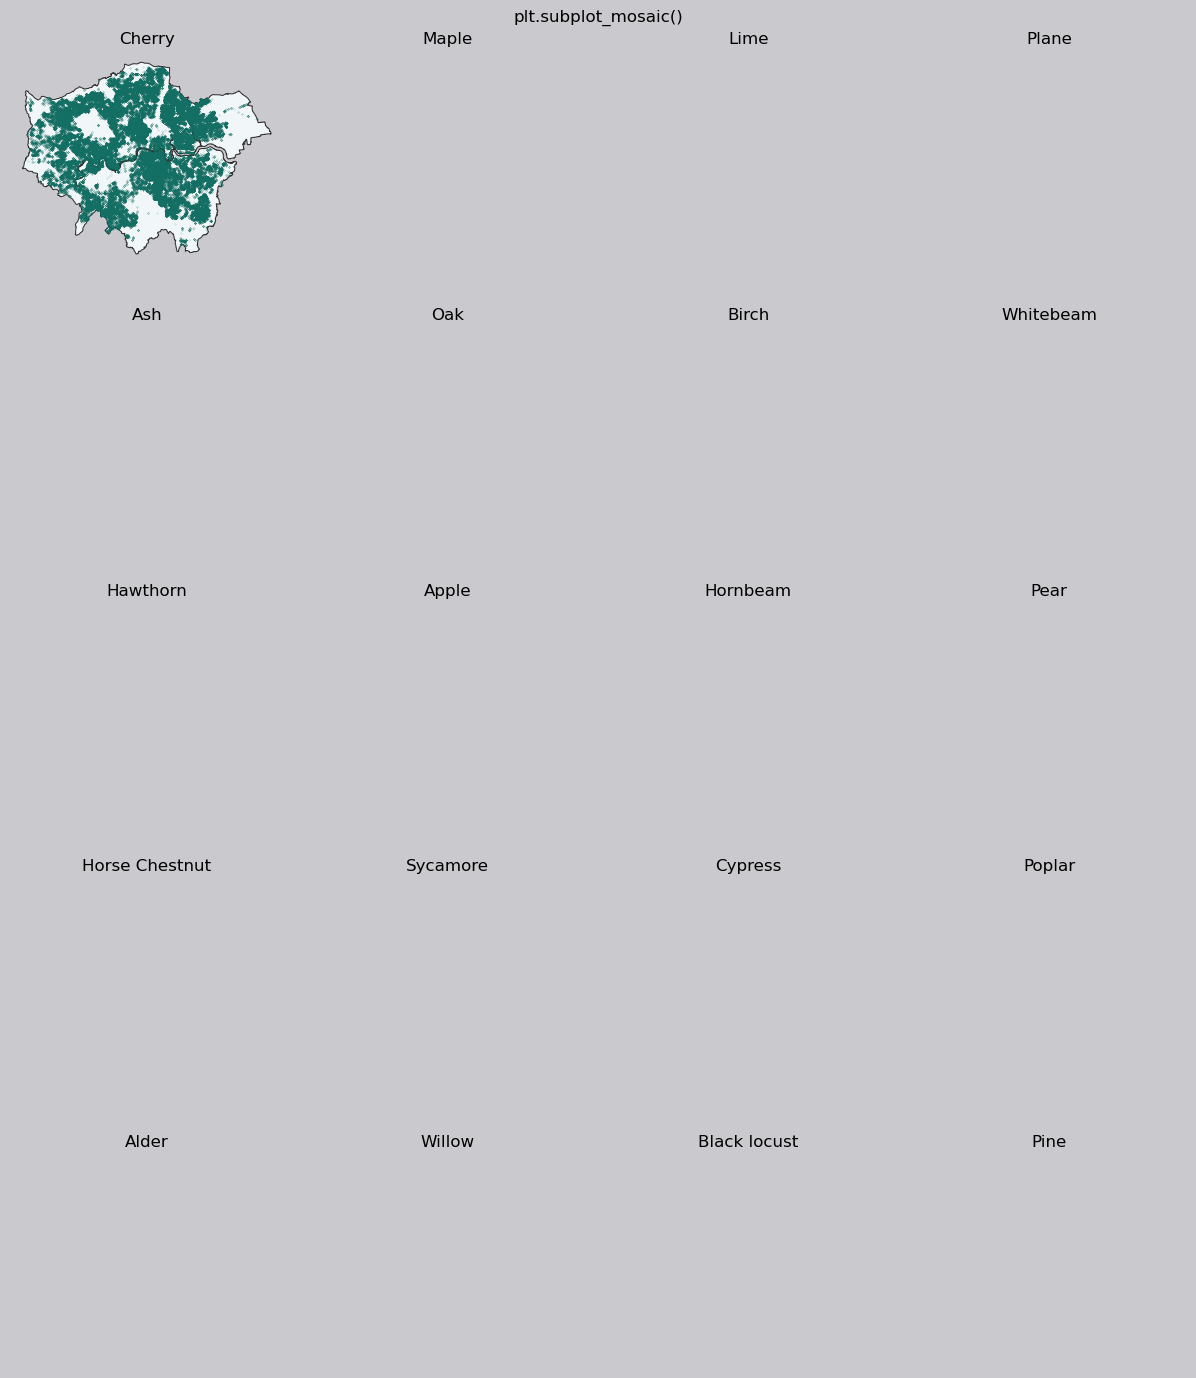

In [59]:
cols = {"bg": "#CACACE", "Cherry": "#136F63", "Maple": "#ADB67C", "Lime": "#729EA1"}

fig, axs = plt.subplot_mosaic([['Cherry', 'Maple','Lime', 'Plane' ],
                               ['Ash', 'Oak', 'Birch', 'Whitebeam'],
                               ['Hawthorn', 'Apple', 'Hornbeam', 'Pear'],
                               ['Horse Chestnut', 'Sycamore', 'Cypress', 'Poplar'],
                               ['Alder', 'Willow', 'Black locust', 'Pine']],
                              figsize=(12, 14))
     
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.95, wspace=0.1, hspace=0.3)    
fig.set_facecolor(cols["bg"])
for ax in axs:
    london.to_crs(epsg=4326).plot(ax=ax, color='#F1F7F8', edgecolor='#333333', linewidth=0.75)
    axs[ax].axis('off')
    axs[ax].set_title(ax)
    axs[ax].set_facecolor(cols["bg"])
   ##
   #if ax in ['Cherry', 'Maple','Lime', 'Plane', 'Ash', 'Oak', 'Birch', 'Whitebeam','Hawthorn', 'Apple', 'Hornbeam', 'Pear']:
   #    data = geo_df[geo_df["gla_tree_name"]==ax]
   #    data.plot(color="#57cc99",
   #          ax=axs[ax],
   #          markersize=0.1,
   #         alpha=0.5)
   ##
    #axs[ax].text(0.5, 0.5, k)

london.to_crs(epsg=4326).plot(ax=axs["Cherry"], color='#F1F7F8', edgecolor='#333333', linewidth=0.75)
data = geo_df[geo_df["gla_tree_name"]=="Cherry"]
data.plot(color=cols["Cherry"], ax=axs["Cherry"], markersize=0.02, alpha=0.7)

fig.suptitle('plt.subplot_mosaic()')

In [ ]:
plt.savefig("Trees-in-London.png")

In [47]:
for ax in axs:
    if ax in ["Cherry", "Maple"]:
        print(ax)

Cherry
Maple
